In [1]:
%matplotlib inline
from fastai import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [8]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.8332,  1.0000],
        [ 0.3754,  1.0000],
        [ 0.3491,  1.0000],
        [ 0.1380,  1.0000],
        [-0.2192,  1.0000]])

In [9]:
a = tensor(3.,2); a

tensor([3., 2.])

In [18]:
y = x@a + torch.rand(n)

tensor([ 5.4956,  3.8863,  3.3198,  3.1052,  2.0720,  2.6213, -0.2817,  4.8423,
         5.8522,  1.7992,  1.7874,  3.8927,  0.6472,  1.2822,  1.5839,  5.0449,
         2.3415,  0.4715,  4.6489,  0.9406,  4.7352,  0.2577,  4.3219,  0.2033,
         0.0517,  0.0517,  3.2228,  4.5400,  4.8399,  2.6825,  3.1475,  2.6549,
         1.3179,  1.6123,  4.5509,  4.4697,  2.2735,  5.1998,  4.1036,  5.6596,
         4.4879,  3.1116,  2.3904,  0.5538,  2.0006,  4.1214,  3.6066,  3.3697,
         4.3523,  1.4563, -0.8695,  0.0183,  1.2149,  2.8874, -0.2559,  1.4781,
         1.8280,  1.0965,  4.4867,  1.2351,  3.6766,  1.2118, -0.9297,  2.7209,
        -0.6017,  4.9471,  2.1907,  2.7842,  0.7279,  2.5687,  3.0287,  2.3003,
         3.2212,  3.0237,  3.2139,  3.4453,  3.8598,  1.0808,  3.0093,  2.1303,
         4.3042,  0.0259,  3.1663,  1.6916, -0.3295,  0.4475,  2.1193,  0.9293,
         0.1741,  3.6290,  0.0901,  0.4919,  2.3316,  5.0814,  5.1359,  1.8104,
         2.6083, -0.0569,  3.6622,  2.71

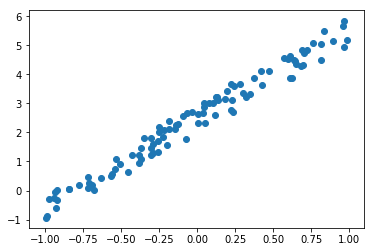

In [19]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [20]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [22]:
a = tensor(-1.,1)

In [24]:
y_hat = x@a
mse(y_hat, y)

tensor(7.1201)

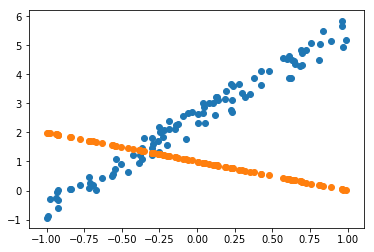

In [26]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of a that minimize mse_loss.

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in PyTorch.

In [28]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [29]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [32]:
lr = 1e-1
for t in range(100): update()

tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)
tensor(0.0788, grad_fn=<MeanBackward1>)


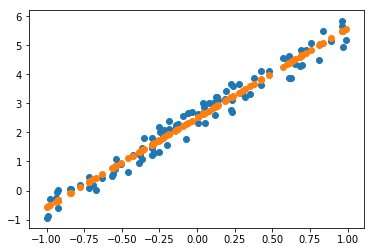

In [33]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

# Animate it!

In [34]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [37]:
#! sudo add-apt-repository ppa:mc3man/trusty-media  
#! sudo apt-get update  
#! sudo apt-get install ffmpeg  
#! sudo apt-get install -y frei0r-plugins

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgavl1 libgtkglext1 libopencv-core2.4v5 libopencv-highgui2.4v5
  libopencv-imgproc2.4v5 libopencv-objdetect2.4v5 libopencv-video2.4v5
  libpangox-1.0-0
Suggested packages:
  opencv-data
The following NEW packages will be installed:
  frei0r-plugins libgavl1 libgtkglext1 libopencv-highgui2.4v5
  libopencv-objdetect2.4v5 libopencv-video2.4v5 libpangox-1.0-0
The following packages will be upgraded:
  libopencv-core2.4v5 libopencv-imgproc2.4v5
2 upgraded, 7 newly installed, 0 to remove and 93 not upgraded.
Need to get 5594 kB of archives.
After this operation, 14.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu xenial/main amd64 libpangox-1.0-0 amd64 0.0.2-5 [41.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu xenial/universe amd64 libgavl1 amd64 1.4.0-4 [3364 kB]
Get:3 http://archive.ubuntu.com/ubuntu xenial-

In [39]:
import time

In [40]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    time.sleep(3)
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)